# Test Code to validate estimatePDF-0.1.0

In [1]:
# pip install dist/estimatePDF-0.1.0-py3-none-any.whl

In [2]:
import sys
import os

import tensorflow as tf
import numpy as np
from scipy.stats import gaussian_kde
# -----------------------------------------------------------------------------
import matplotlib.pyplot as plt
print(sys.version)


3.8.12 | packaged by conda-forge | (default, Sep 29 2021, 19:21:23) 
[Clang 11.1.0 ]


In [3]:
# Import classes/functions from modules
import estimatePDF.DensityEstimate as DensityEstimate
import estimatePDF.ProbabilityDensityFunction as PDF
import estimatePDF.DualPolyRegPDF as DPR

### For Evaluation Purpose - SpiPyKDE Function

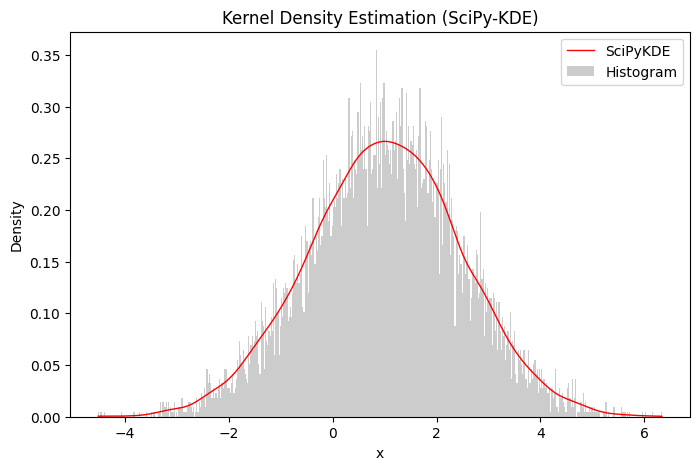

In [4]:
#*************************************************************
# Test Code
#*************************************************************
X_np = np.random.normal(loc=1.0, scale=1.5, size=10000)
x_np, pdf_np = DensityEstimate.SciPyKDE(X_np, Points=1000)
#----------------------------------
# Plot
plt.figure(figsize=(8,5))
plt.plot(x_np, pdf_np, lw=1, c='r', label='SciPyKDE')

plt.hist(X_np, bins=500, density=True, alpha=0.4, color='gray', lw=0.5, label='Histogram')

plt.title('Kernel Density Estimation (SciPy-KDE)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

### For Evaluation  Purpose - KDE Function

2025-09-27 12:13:43.268769: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-27 12:13:43.268790: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-09-27 12:13:43.422409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Metal device set to: Apple M1 Max


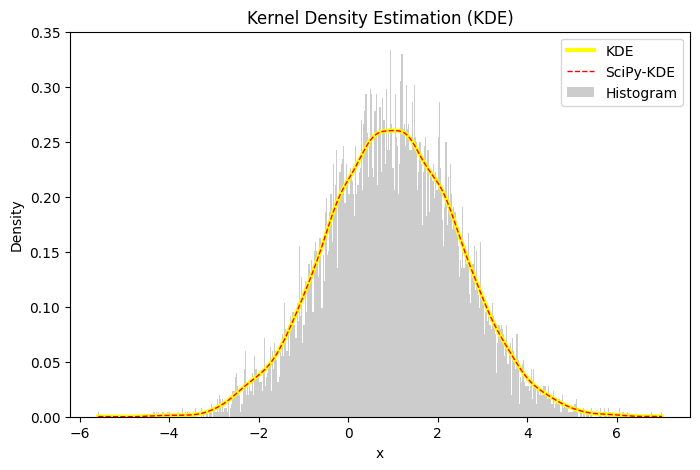

In [5]:
#*************************************************************
# Test Code
#*************************************************************
X_np = np.random.normal(loc=1.0, scale=1.5, size=10000)
# Convert to Tensor
X_tf = tf.constant(X_np, dtype=tf.float32)
# Run KDE
x_vals, pdf_vals = DensityEstimate.KDE(X_tf, Points=1000)
# Convert output tensors to numpy for plotting
x_np = x_vals.numpy()
pdf_np = pdf_vals.numpy()
#----------------------------------
# Use scipy KDE with bandwidth using Silverman's rule
# Bandwidth selection (Silverman's rule if None)
x, pdfSciPy = DensityEstimate.SciPyKDE(X_np, bandwidth=None, Points=500)
#----------------------------------
# Plot
plt.figure(figsize=(8,5))
plt.plot(x_np, pdf_np, lw=3, c='yellow', label='KDE')
plt.plot(x, pdfSciPy, lw=1, ls='--', c='r', label='SciPy-KDE')
plt.hist(X_np, bins=500, density=True, alpha=0.4, color='gray', lw=0.5, label='Histogram')

plt.title('Kernel Density Estimation (KDE)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

## For Evaluation Purpose - HDE Function

2025-09-27 12:13:44.135874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


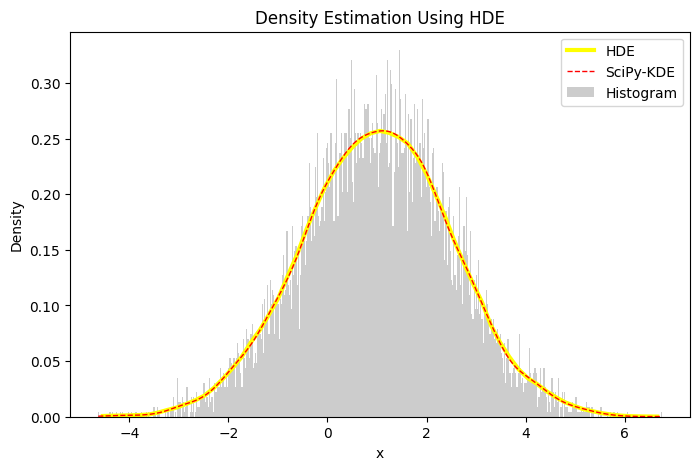

In [6]:
#*************************************************************
# Test Code
#*************************************************************
X_np = np.random.normal(loc=1.0, scale=1.5, size=10000)
# Convert to Tensor
X_tf = tf.constant(X_np, dtype=tf.float32)
# Run histogram density estimation with print enabled
x_vals, pdf_vals, bin_width = DensityEstimate.HDE(X_tf)    
# Convert output tensors to numpy for plotting
x_np = x_vals.numpy()
pdf_np = pdf_vals.numpy()
#----------------------------------
# Use scipy KDE with bandwidth using Silverman's rule
# Bandwidth selection (Silverman's rule if None)
x, pdfSciPy = DensityEstimate.SciPyKDE(X_np, bandwidth=None, Points=500)
#----------------------------------
# Plot
plt.figure(figsize=(8,5))
plt.plot(x_np, pdf_np, lw=3, c='yellow', label='HDE')
plt.plot(x, pdfSciPy, lw=1, ls='--', c='r', label='SciPy-KDE')
plt.hist(X_np, bins=500, density=True, alpha=0.4, color='gray', lw=0.5, label='Histogram')

plt.title('Density Estimation Using HDE')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


## Test Code to Evaluate M_Wright( ) &  M_Wright_Reflect( )

M_Wright(): NaN / Inf
x: (100,)
Term: (100,)
M: (100,)
Number of NaN values in mw_x: 50

x: (100,)
coeff: (100,)
M: (100,)
Number of NaN values in mwR_x: 0



/Users/shansarkar/MyTensor/ProbFunc/estimatePDF/estimatePDF/ProbabilityDensityFunction.py:368: RuntimeWarning: overflow encountered in power
  Term = ((-x) ** j) / denom
/Users/shansarkar/MyTensor/ProbFunc/estimatePDF/estimatePDF/ProbabilityDensityFunction.py:369: RuntimeWarning: invalid value encountered in add
  M += Term


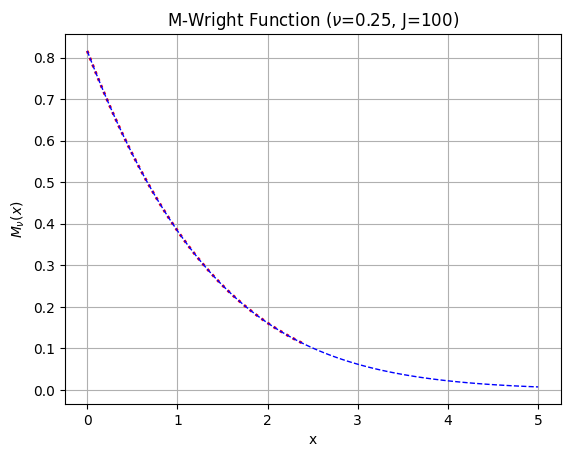

In [7]:
v = 0.25
J=100
x = np.linspace(0, 5, 100)
mw_x = PDF.M_Wright(x, v, J, SafeCheck=False, Print=True)
nan_count = np.sum(np.isnan(mw_x))
print(f'Number of NaN values in mw_x: {nan_count}\n')   

mwR_x = PDF.M_Wright_Reflect(x, v, J, SafeCheck=False, Print=True)
nan_count = np.sum(np.isnan(mwR_x))
print(f'Number of NaN values in mwR_x: {nan_count}\n')
# Plot
plt.plot(x, mw_x, c='r', ls=':', lw=2)
plt.plot(x, mwR_x, c='b',ls='--', lw=1)
plt.title(f'M-Wright Function ($\\nu$={v}, J={J})')
plt.xlabel('x')
plt.ylabel(f'$M_\\nu(x)$')
plt.grid(True)
plt.show()


## Test Code to Evaluate Func. M_CDF( ) & Create_AWM_I_PDF( )

#### Utilizing Func M_Wright_Reflect( )

Number of NaN values in Mw_xLamda: 0
Number of NaN values in Mv_xLamda: 0
Number of NaN values in Mv_xAbs: 0
Number of NaN values in pdf: 0
PDF AUC: 1.000


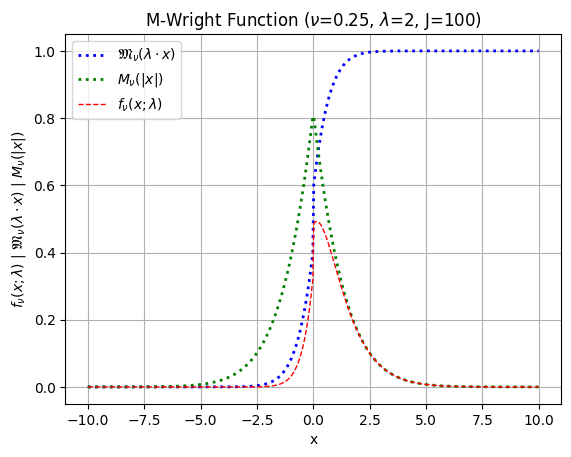

In [8]:
# Test
v = 0.25
J=100
Lamda=2#-0.5
x = np.linspace(-10, +10, 500)
y=Lamda*x
M_cdf = PDF.M_CDF(y, v, J)#, Print=True)
nan_count = np.sum(np.isnan(M_cdf))
print(f'Number of NaN values in Mw_xLamda: {nan_count}')

Mv_xLamda = PDF.M_Wright_Reflect(y, v, J)
nan_count = np.sum(np.isnan(Mv_xLamda))
print(f'Number of NaN values in Mv_xLamda: {nan_count}')    

Mv_xAbs = PDF.M_Wright_Reflect(np.abs(x), v, J)
nan_count = np.sum(np.isnan(Mv_xAbs))
print(f'Number of NaN values in Mv_xAbs: {nan_count}')

pdf = PDF.Create_AWM_I_PDF(x, v, Lamda, J)
nan_count = np.sum(np.isnan(pdf))
print(f'Number of NaN values in pdf: {nan_count}')  
print(f"PDF AUC: {np.trapz(pdf, x):.3f}") #TensorAUC(x, pdf)
# Plot
plt.plot(x, M_cdf, c='b', ls=':', lw=2, label=r'$\mathfrak{M}_\nu(\lambda \cdot x)$')
#plt.plot(x, Mv_xLamda, c='k', ls=':', lw=2, label=r'$M_\nu(x\lambda)$')
plt.plot(x, Mv_xAbs, c='g', ls=':', lw=2, label=r'$M_\nu(|x|)$')
plt.plot(x, pdf, c='r',ls='--', lw=1, label=r'$f_\nu(x; \lambda)$')
plt.title(f'M-Wright Function ($\\nu$={v}, $\\lambda$={Lamda}, J={J})')
plt.xlabel('x')
plt.ylabel(r'$f_\nu(x; \lambda)$ | $\mathfrak{M}_\nu(\lambda \cdot x)$ | $M_\nu(|x|)$')
plt.legend()
plt.grid(True)
plt.show()



## Test Code to Evaluate Func. Create_AWM_II_PDF( )

#### Utilizing Func M_Wright_Reflect( )

x: (250,)
coeff: (250,)
M: (250,)
Number of NaN values in M_AlphaPosX: 0
x: (250,)
coeff: (250,)
M: (250,)
Number of NaN values in M_AlphaNegX: 0
Number of NaN values in pdf: 0
PDF AUC: 0.995


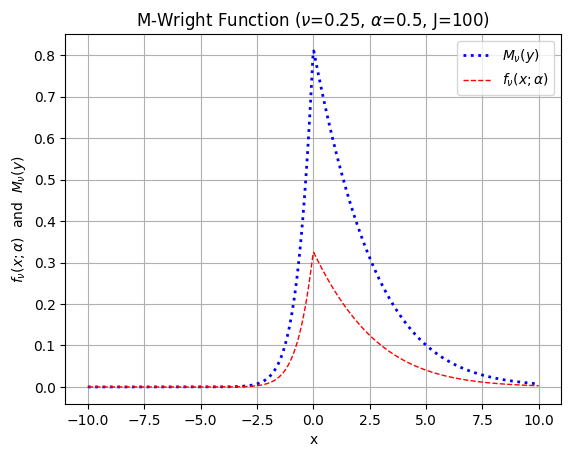

In [9]:
# Test
v = 0.25 # 0 < v < 0.3
J= 100
Alpha=0.5 # 0.3-0.7 or 1.3 - 1.7
x = np.linspace(-10, 10, 500)
xPos = x[np.where(x >= 0)[0]]; y=xPos*Alpha
M_AlphaPosX = PDF.M_Wright_Reflect(y, v, J, SafeCheck=False, Print=True)
nan_count = np.sum(np.isnan(M_AlphaPosX))
print(f'Number of NaN values in M_AlphaPosX: {nan_count}')

xNeg = x[np.where(x < 0)[0]]; y=-xNeg/Alpha
M_AlphaNegX = PDF.M_Wright_Reflect(y, v, J,SafeCheck=False, Print=True)
nan_count = np.sum(np.isnan(M_AlphaNegX))
print(f'Number of NaN values in M_AlphaNegX: {nan_count}')    
M_AlphaAllX = np.concatenate([M_AlphaNegX, M_AlphaPosX])


pdf = PDF.Create_AWM_II_PDF(x, v, Alpha, J)
nan_count = np.sum(np.isnan(pdf))
print(f'Number of NaN values in pdf: {nan_count}') 
print(f"PDF AUC: {np.trapz(pdf, x):.3f}") #TensorAUC(x, pdf)
# Plot
plt.plot(x, M_AlphaAllX, c='b', ls=':', lw=2,label=r'$M_\nu(y)$')
plt.plot(x, pdf, c='r',ls='--', lw=1, label=r'$f_\nu(x; \alpha)$')

plt.title(f'M-Wright Function ($\\nu$={v}, $\\alpha$={Alpha}, J={J})')
plt.xlabel('x')
plt.ylabel(r'$f_\nu(x; \alpha)$  and  $M_\nu(y)$')
plt.legend()
plt.grid(True)
plt.show()


## Test Code to Evaluate Func. AsymLaplacePDF() & SampleAsymLaplace( )

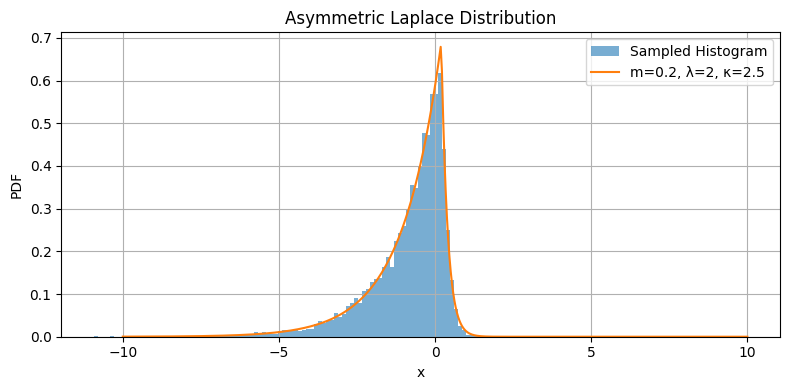

PDF AUC: 0.999


In [10]:
# Parameters for the Asymmetric Laplace Distribution
m = 0.2       # location
lamda = 2 # scale
kappa = 2.5 # asymmetry
N=500

# Generate x values and corresponding PDF values
x_vals = np.linspace(-10, 10, N)
pdf_vals = PDF.AsymLaplacePDF(x_vals, m, lamda, kappa)

# Generate the dataset X^
X_hat = PDF.SampleAsymLaplace(m, lamda, kappa, 10000)

# Plot the distribution
plt.figure(figsize=(8, 4))
plt.hist(X_hat, bins=100, density=True, alpha=0.6, label="Sampled Histogram")
plt.plot(x_vals, pdf_vals, label=f"m={m}, λ={lamda}, κ={kappa}")
plt.title("Asymmetric Laplace Distribution")
plt.xlabel("x")
plt.ylabel("PDF")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"PDF AUC: {np.trapz(pdf_vals, x_vals):.3f}")#TensorAUC(x_vals, pdf_vals):.3f}")

## Test Code - DualPolyRegPDF()


std: 1.481

Case 1: KDE + RetProb=True


2025-09-27 12:13:45.544854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


AUC (np.trapz(y_fit, x_fit)): 1.0

Case 2: KDE + RetProb=False


2025-09-27 12:13:45.979411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-09-27 12:13:46.049771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


AUC (np.trapz(y_fit, x_fit)): 0.99971914

Case 3: HDE + RetProb=True
AUC (np.trapz(y_fit, x_fit)): 1.0

Case 4: HDE + RetProb=False
AUC (np.trapz(y_fit, x_fit)): 1.0000788


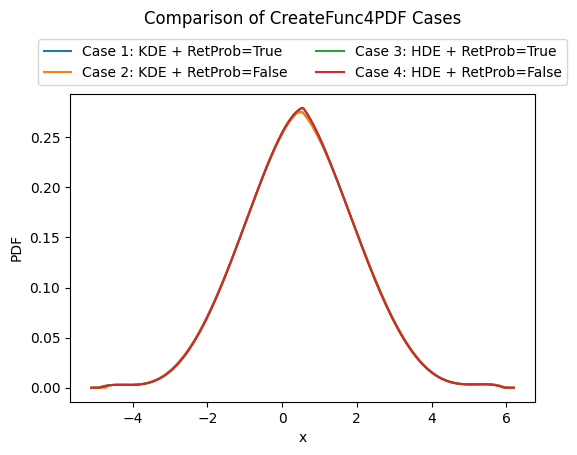

In [11]:
np.random.seed(0)
fig, bx = plt.subplots(1, 1, figsize=(6, 4));
data = np.random.normal(loc=0.5, scale=1.5, size=10000)
print(f'std: {np.std(data):.3f}')
data_tf = tf.constant(data, dtype=tf.float32)

cases = [   {"UseKDE": True,  "RetProb": True,  "label": "Case 1: KDE + RetProb=True"},
            {"UseKDE": True,  "RetProb": False, "label": "Case 2: KDE + RetProb=False"},    
            {"UseKDE": False, "RetProb": True,  "label": "Case 3: HDE + RetProb=True"},
            {"UseKDE": False, "RetProb": False, "label": "Case 4: HDE + RetProb=False"},]

for case in cases:
    print("\n" + "="*80)
    print(case["label"])
    print("="*80)

    result = DPR.DualPolyRegPDF(Superset=data_tf,
                                Points=200,
                                PolyOrder=5,
                                TimesStd=5,
                                UseKDE=case["UseKDE"],
                                RetProb=case["RetProb"],
                                Print=False)

    if case["RetProb"]:
        # result is (x, y)
        x_fit, y_fit = result
    else:
        # result is a callable function → compute probabilities
        func = result
        x_fit = np.linspace(np.min(data), np.max(data), 200).astype(np.float32)
        yHat = func(tf.constant(x_fit, dtype=tf.float32))
        y_fit = yHat.numpy()

    auc = np.trapz(y_fit, x_fit)
    print("AUC (np.trapz(y_fit, x_fit)):", auc)

    bx.plot(x_fit, y_fit, label=case["label"])

bx.set_title("Comparison of CreateFunc4PDF Cases", y=1.2)
bx.set_xlabel("x")
bx.set_ylabel("PDF")
bx.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.2))
plt.show();
